# Logistic function
wiki: https://en.wikipedia.org/wiki/Logistic_function

<IPython.core.display.Javascript object>


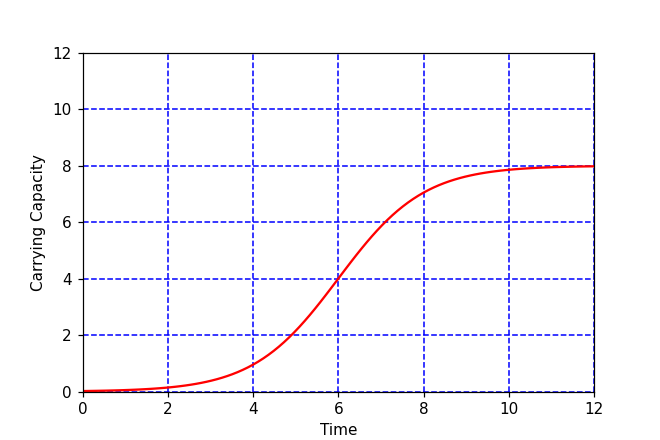

interactive(children=(IntSlider(value=8, description='c', max=12), FloatSlider(value=1.0, description='k', max…

In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import math

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis([0, 12, 0, 12])
ax.grid(color='b', linestyle='--', linewidth=1)
ax.set_xlabel('Time')
ax.set_ylabel('Carrying Capacity')
 
# generate x values
x = np.linspace(0, 12, 100)
 
def logistic(x,c,k,x0):
    return np.array([c/(1+math.exp(-k*(x-x0))) for x in x])
 
@widgets.interact(c=(0, 12, 1), k=(0, 2, 0.05), x0=(0, 10, 1), clean = True)
def update(c = 8, k = 1, x0 = 6, clean=True):
    """Remove old lines from plot and plot new one"""
    if clean:
        [l.remove() for l in ax.lines]
    else:
        None
    ax.plot(x, logistic(x,c,k,x0), color='r')

# Fourier series

<IPython.core.display.Javascript object>


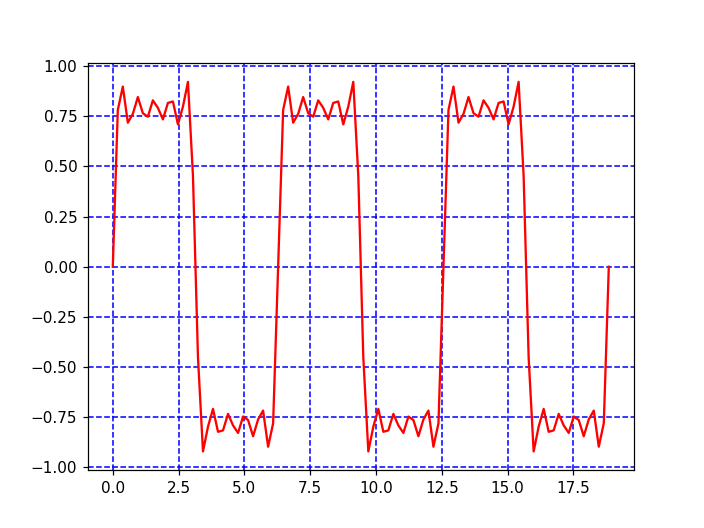

interactive(children=(IntSlider(value=10, description='cycle', min=1), Checkbox(value=True, description='clean…

In [2]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 6*np.pi, 100)

fig, ax = plt.subplots(1)
ax.grid(color='b', linestyle='--', linewidth=1)

def square_wave_fouries(x,cycle):
    y = []
    for point in x:
        final_value = 0
        for n in range(1,cycle,2):
            final_value = final_value + np.sin(n*point)/n
        y.append(final_value)
    return np.array(y)

@widgets.interact(cycle=(1, 100, 1), clean = True)
def update(cycle = 10, clean=True):
    """Remove old lines from plot and plot new one"""
    if clean:
        [l.remove() for l in ax.lines]
    else:
        None
    ax.plot(x, square_wave_fouries(x,cycle), color='r')

# Seasonality model(Fourier series)

<IPython.core.display.Javascript object>


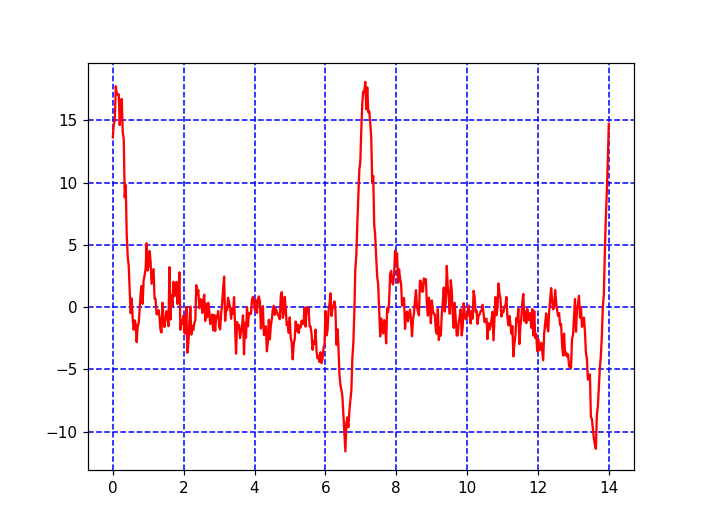

interactive(children=(IntSlider(value=10, description='cycle', min=1), IntSlider(value=1, description='a', max…

In [3]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt



fig, ax = plt.subplots(1)
ax.grid(color='b', linestyle='--', linewidth=1)

def seasonal_wave(x,cycle,a,b,p):
    y = []
    for t in x:
        final_value = 0
        for n in range(1,cycle,1):
            random_a = a+np.random.random()
            random_b = b+np.random.random()
            final_value = final_value + random_a*np.cos(2*np.pi*n*t/p) + random_b*np.sin(2*np.pi*n*t/p) 
        y.append(final_value)
    return np.array(y)

@widgets.interact(cycle=(1, 100, 1),a = (-2,2,1), b = (-2,2,1), p = [7,30,90,365] , max_x = [14,60,180,365], clean = True)
def update(cycle = 10, a = 1, b = 1, p = 7, max_x = 14,  clean=True):
    """Remove old lines from plot and plot new one"""
    x = np.linspace(0, max_x, 500)
    if clean:
        [l.remove() for l in ax.lines]
    else:
        None
    ax.plot(x, seasonal_wave(x,cycle,a,b,p), color='r')